                                          EXPLORATORY DATA ANALYSIS(EDA) OF ZOMATO BANGALORE RESTAURANTS

INTRODUCTION:
Zomato is a global restaurant discovery and food delivery platform that connects users with a wide array of restaurants, enabling them to explore cuisines, book tables, place online orders, and leave reviews and ratings. The platform focuses on providing seamless experiences through its robust database of restaurant information, customer feedback, and cost-effective dining options. With its dynamic features and user-friendly interface, Zomato has transformed how people interact with dining establishments.


DATASET:
The dataset has been taken from Kaggle. It contains around 51717 rows and 17 columns of data. The attributes in the dataset are as follows:

1. URL: The restaurant’s website URL
2. address: Address of the restaurant
3. name: Name of the restaurant
4. online_orders: It specifies if the restaurant takes online orders or not.
5. book_table: Indicates whether or not the restaurant offers table reservations.
6. rate: The restaurant’s rating out of 5
7. votes: Number of votes received by the restaurant on Zomato
8. phone: the restaurant’s phone number
9. location: the neighborhood in which the restaurant is located.
10. rest_type: specifies the type of restaurant.
11. disk_liked: Indicates which dishes were popular among customers in that restaurant.
12. Cuisines: Cuisines available at the restaurant
13. approx_cost (for two people): Estimated cost of food in that restaurant for two people.
14. Reviews_list: Reviews given by users
15. menu_item: The restaurant’s menu
16. listed_in(type): Specifies the type of service provided by a restaurant
17. listed_in(city): The restaurant is on the city’s list.

OBJECTIVES:
The analysis that we are going to perform shall answer the following questions:

1. What is the majority service of ordering food-online or offline?
2. Is Table Booking facility common in Bangalore restaurants?
3. How does table booking facility related to ratings received by restaurants?
4. What is the average rating received by the restaurants?
5. Which is the most popular restaurant type?
6. Does ratings of restaurants are affected by the mode of ordering food?
7. How much approximate cost  mostly two persons( or couples) spend ?
8. Name the most popular location for foodies in Bangalore.
9. Show the maximum food chains in Bangalore.
10. Which type of food items mostly ordered through online?

Import the libraries and dataset

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\\Users\\hp\\Downloads\\zomato.csv.zip")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Exploring the Data

In [98]:
df.shape

(51717, 17)

In [99]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [100]:
df=df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


Cleaning the Data

In [102]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [103]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

 Removing "NEW" , "-" and "/5" from Rate Column

In [104]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
df['rate']=df['rate'].apply(handlerate)
df['rate'].head

<bound method NDFrame.head of 0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51609, dtype: float64>

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         41590 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


 Drop Null Values

In [106]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [107]:
df.rename(columns={'approx_cost(for two people)':'cost_2plates' ,'listed_in(type)':'type', 'listed_in(city)':'city'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2plates,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [108]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [109]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [110]:
df['cost_2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [111]:
def handlecomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',' ,'')
        return float(value)
    else:
        return float(value)
df['cost_2plates']=df['cost_2plates'].apply(handlecomma)
df.head()
    

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2plates,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


Cleaning rest_type column

In [112]:
rest_types=df['rest_type'].value_counts(ascending=False)
rest_types

rest_type
Quick Bites                   13861
Casual Dining                  9597
Cafe                           3365
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

In [113]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Bakery                        704
Bar                           640
Beverage Shop                 638
Food Court                    496
Bar, Casual Dining            381
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Bakery, Beverage Shop           1
Quick Bites, Kiosk              1
Name: count, Length: 80, dtype: int64

Making rest_types<1000 in frequency as others

In [114]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           13861
Casual Dining          9597
others                 8490
Cafe                   3365
Dessert Parlor         1848
Delivery               1666
Takeaway, Delivery     1276
Casual Dining, Bar     1087
Name: count, dtype: int64

Cleaning location column

In [115]:
location=df['location'].value_counts(ascending=False)
location_lessthan300=location[location <300]
def location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(handle_rest_type)
df['location'].value_counts()

location
BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64

Cleaning cuisines column

In [116]:
cuisines=df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                23103
North Indian                           2107
North Indian, Chinese                  1949
South Indian                           1231
Cafe                                    620
                                      ...  
Chinese, Thai, Momos                    110
North Indian, Chinese, Continental      105
Andhra, Biryani                         104
Italian, Pizza                          101
Cafe, Bakery                            100
Name: count, Length: 62, dtype: int64

DATA VISUALISATION

 Various Locations

C:\Users\hp\AppData\Local\Temp\ipykernel_14384\1720144267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['location'], palette="rainbow")


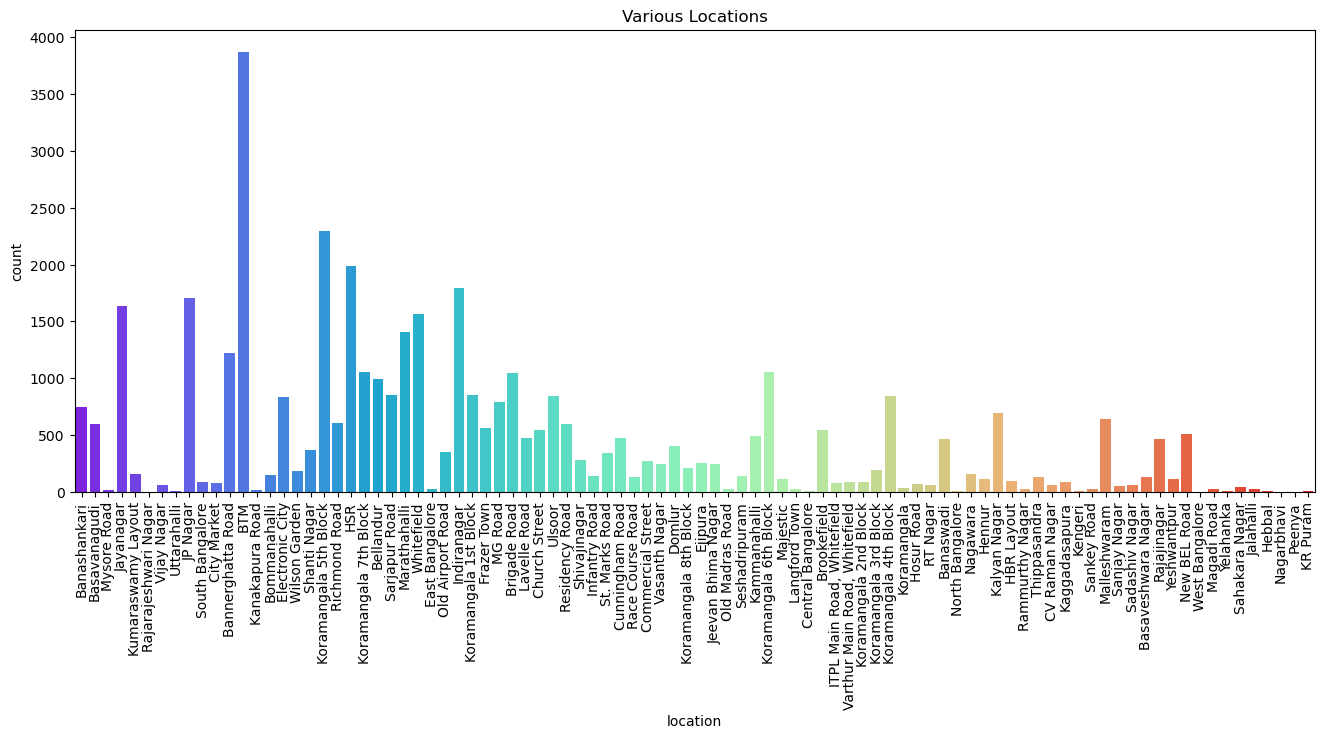

In [117]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x=df['location'], palette="rainbow")
plt.xticks(rotation=90)
plt.title("Various Locations")
plt.show()

Conclusion: BTM City is the most popular location for foodies.

1. Visualising Online Order

C:\Users\hp\AppData\Local\Temp\ipykernel_14384\3077419574.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'], width=0.5,palette="magma")


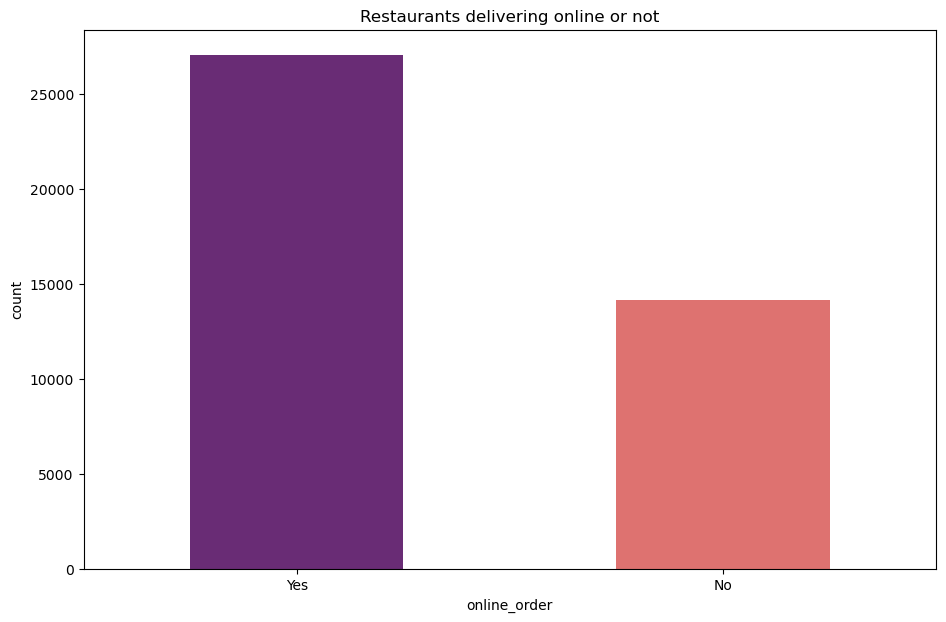

In [126]:
sns.countplot(x=df['online_order'], width=0.5,palette="magma")
plt.title("Restaurants delivering online or not")
plt.show()

Conclusion: Most of the restaurants are available for online order facility and the online orders are preferred over offline by the people.
Reasons:
=> Convenience
=> Vast variety of options to choose from and facility of modify accordingly
=> Saves time 
=> Allows reviews access.

2. Restaurants allowing table Booking Facility

C:\Users\hp\AppData\Local\Temp\ipykernel_14384\2354566301.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['book_table'], width=0.5, palette="cividis")


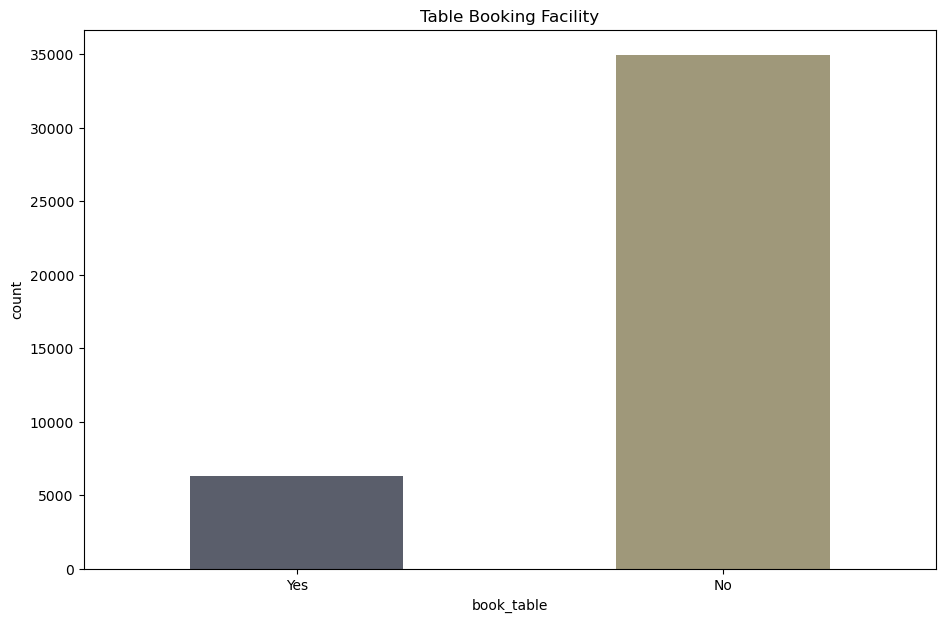

In [119]:
sns.countplot(x=df['book_table'], width=0.5, palette="cividis")
plt.title("Table Booking Facility")
plt.show()

Conclusion: Most of the restaurants do not provide table booking/reservation facility.

3. Visualising Table Booking Rate vs rate

4. Average rating

In [ ]:
plt.rcParams['figure.figsize']=(11,7)
Y=pd.crosstab(df['rate'],df['book_table'])
Y.div(Y.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['green','orange'])
plt.title("Table Booking vs Rate")
plt.show()

Conclusion:
It can be clearly observed that the restaurants that provide table booking facility receives more ratings than the restaurants that don't allow the same.
This criteria should be focused by the restaurants to get higher ratings.

5. Types of Restaurants

C:\Users\hp\AppData\Local\Temp\ipykernel_14384\2453592834.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rest_type'],palette="magma",width=0.5)


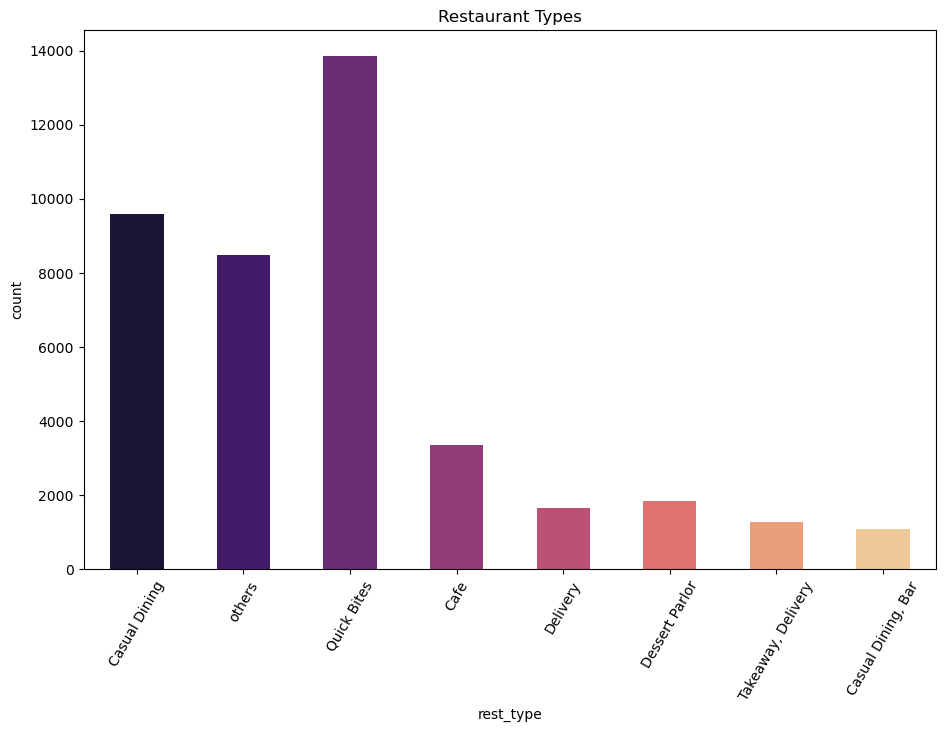

In [121]:
sns.countplot(x=df['rest_type'],palette="magma",width=0.5)
plt.title("Restaurant Types")
plt.xticks(rotation=60)
plt.show()

Conclusion: Quick Bites has highest demand or popularity in terms of restaurant types.

6. Online Order vs Ratings

C:\Users\hp\AppData\Local\Temp\ipykernel_14384\3885108224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="rate",x="online_order",data=df, palette="Set1")


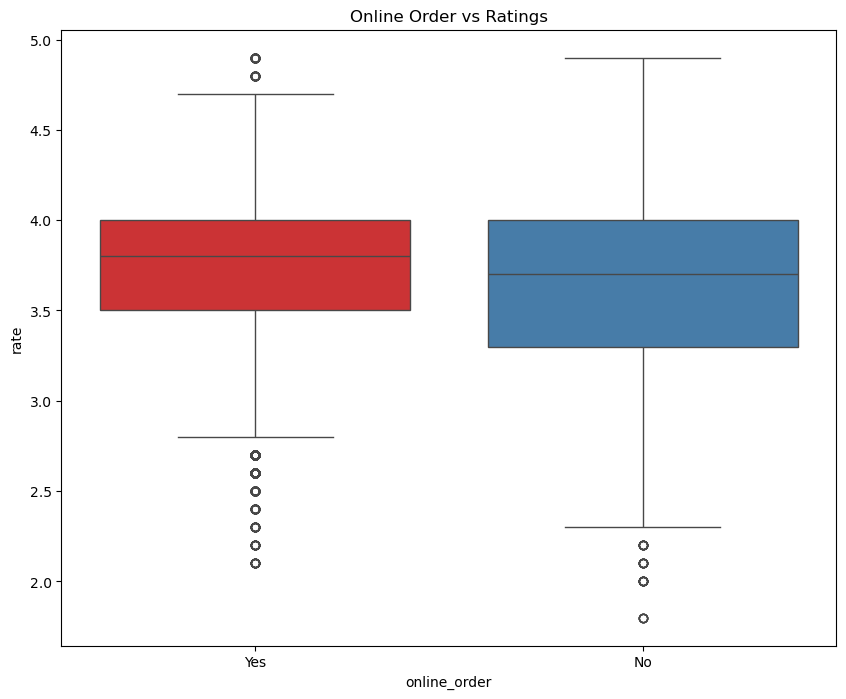

In [124]:
plt.figure(figsize=(10,8))
sns.boxplot(y="rate",x="online_order",data=df, palette="Set1")
plt.title("Online Order vs Ratings")
plt.show()

Conclusion: Ratings don't get much affected by the mode of ordering-online or offline.
However,the Average rating lies between 3.5 to 4 and is higher for online one.
This shows that taste and facilities etc. have direct impact on rating not the mode .

7. Cost

C:\Users\hp\AppData\Local\Temp\ipykernel_14384\374898911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['cost_2plates'],palette="rainbow")


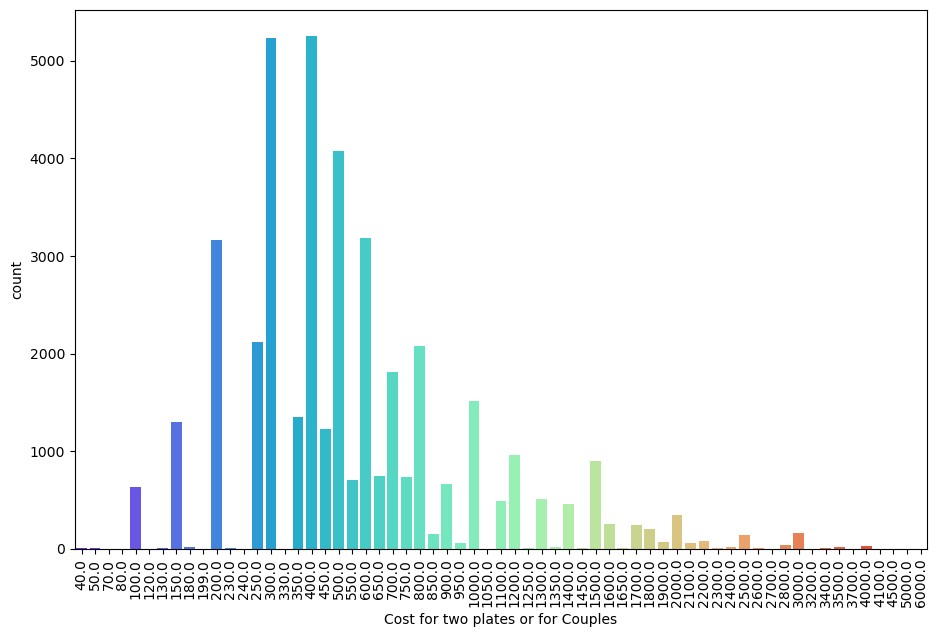

In [125]:
sns.countplot(x=df['cost_2plates'],palette="rainbow")
plt.xticks(rotation=90)
plt.xlabel("Cost for two plates or for Couples")
plt.show()


Conclusion: Generally, two people(or couples) spend Rs.300 to 400 as the highest on ordering food.

8. No. of restaurants in a location

C:\Users\hp\AppData\Local\Temp\ipykernel_14384\1303417501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  loc=sns.countplot(x="location",data=df,palette="Set1")
C:\Users\hp\AppData\Local\Temp\ipykernel_14384\1303417501.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")


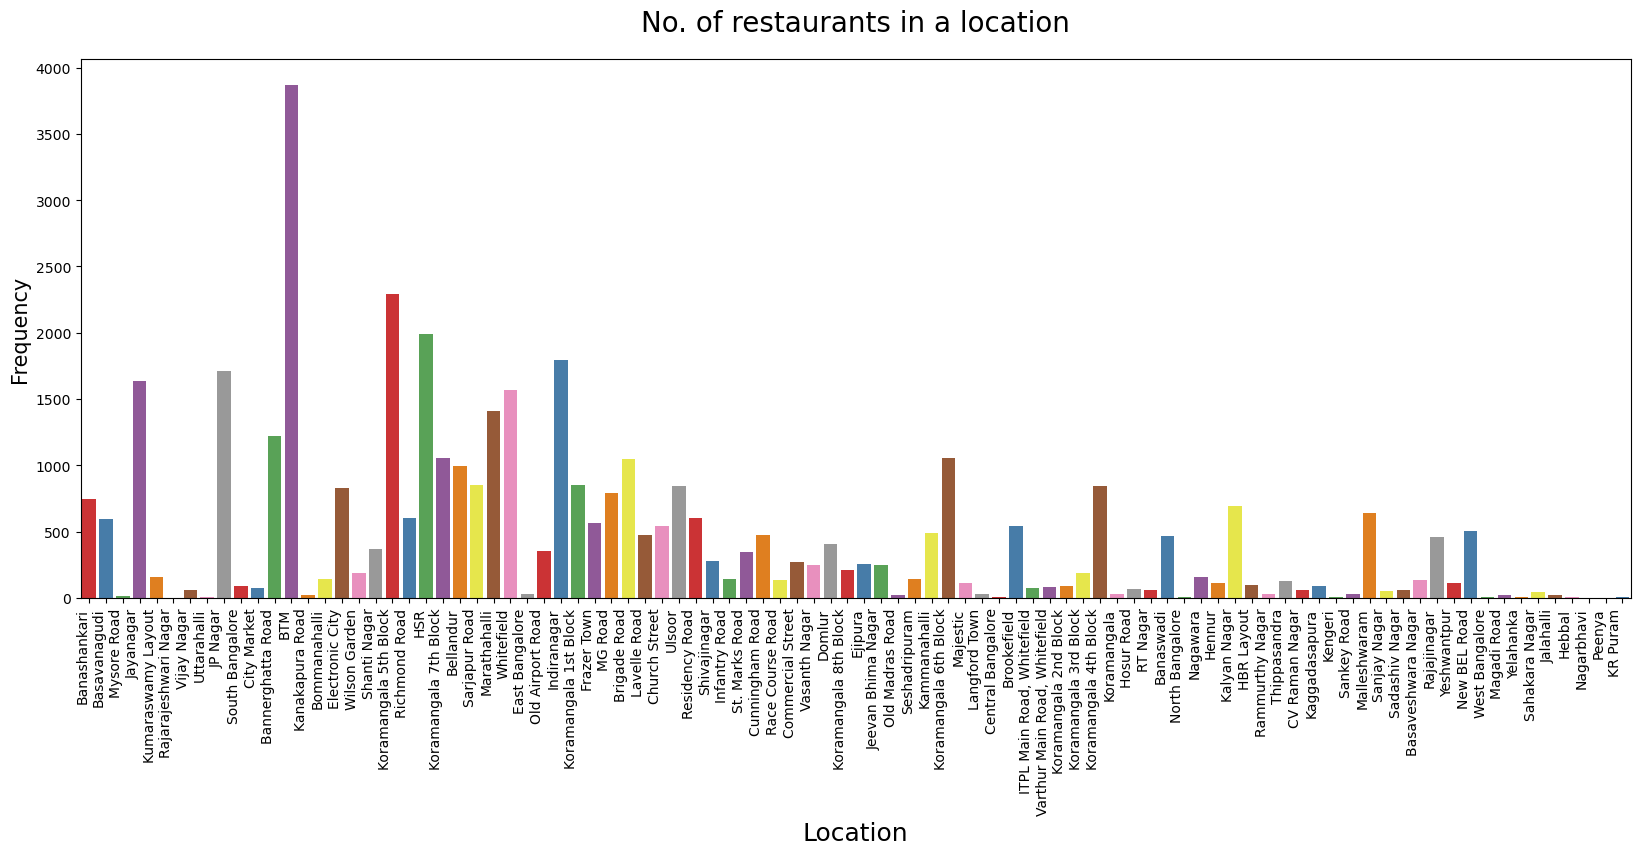

In [127]:
fig=plt.figure(figsize=(20,7))
loc=sns.countplot(x="location",data=df,palette="Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title("No. of restaurants in a location",size=20,pad=20)
plt.show()

Conclusion: Maximum no. of restaurants are located in BTM city.

9. Most Famous Restaurant Chains in Bangalore 

C:\Users\hp\AppData\Local\Temp\ipykernel_14384\3206360940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette="gist_earth")


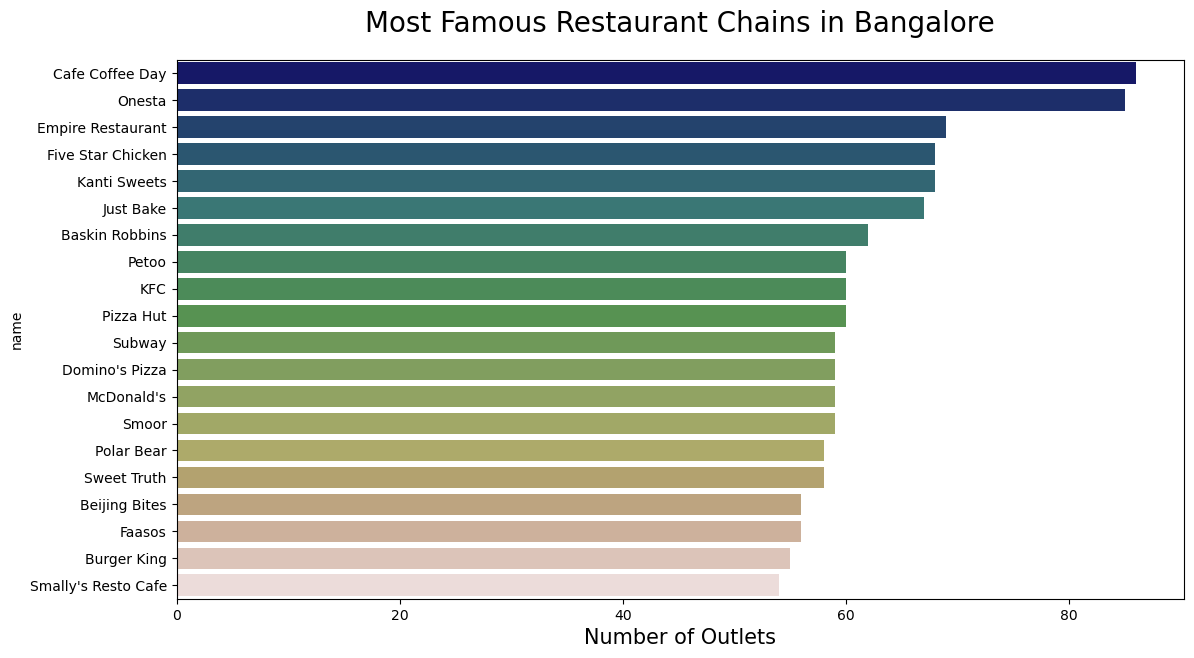

In [128]:
plt.figure(figsize=(13,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette="gist_earth")
plt.title("Most Famous Restaurant Chains in Bangalore", size=20, pad=20)
plt.xlabel("Number of Outlets",size=15)
plt.show()

10. Type of food items relation with ordering mode

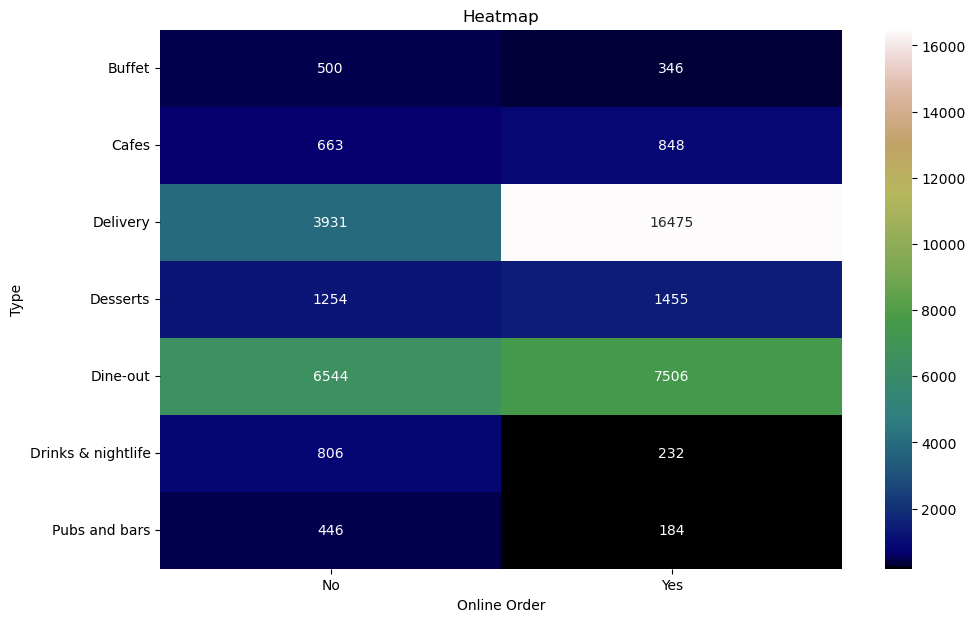

In [130]:
pivot_table=df.pivot_table(index='type', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="gist_earth",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type")
plt.show()

Conclusion: Buffet has highest demand.

Final Insight:
Here, we performed exploratory data analysis on the Zomato Bangalore Restaurants dataset and looked into the most influencing factors that led to a restaurant’s successful running in the city.

Key Takeaways:

=> Restaurant ratings are highly influenced by the restaurant’s cuisine, facilities, and pricing.
=> The locality where the restaurant is situated also helps in predicting whether the restaurant will run successfully or not.
=> The Zomato Bangalore dataset has analysed to understand people’s choice of cuisine, dining type, preference for location according to price etc. It will really help the upcoming new restaurants to decide the people’s preference for cuisine, dinning type.We find some great results like which city has the most number of restaurants , which are the top rated restaurant in a given area for a given cuisine type, what all cuisines are mostly preferred by people ,which are the cheapest areas for having food etc.